In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('TF_2_Notebooks_and_Data/DATA/cancer_classification.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

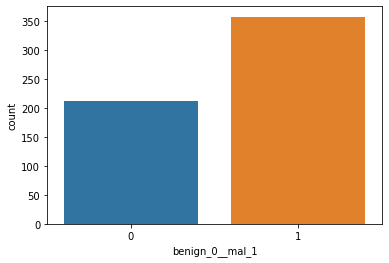

In [17]:
sns.countplot('benign_0__mal_1',data=df)

<AxesSubplot:>

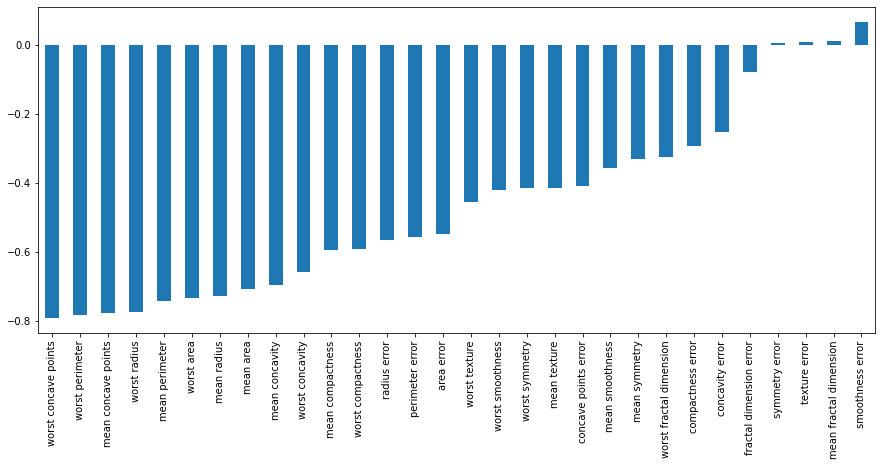

In [18]:
plt.figure(figsize=(15,6))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot(kind='bar')

<AxesSubplot:>

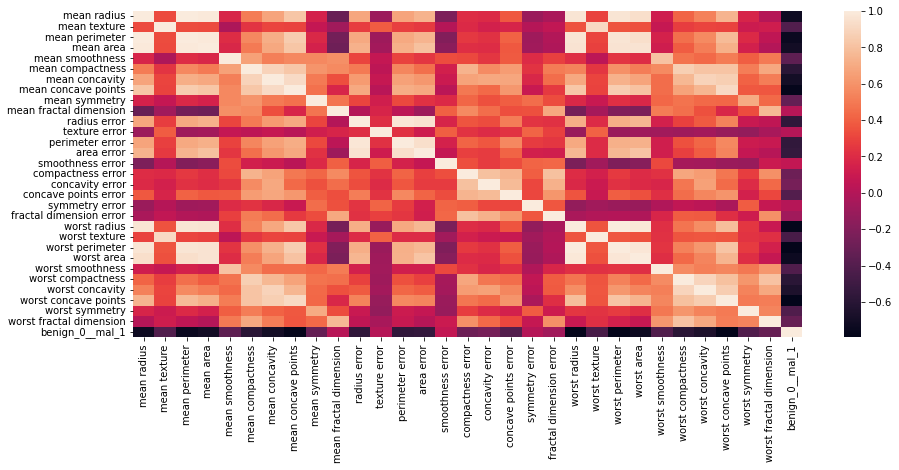

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

In [20]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(398, 30)

In [29]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 1s 17ms/step - loss: 0.6860 - val_loss: 0.6587
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6359 - val_loss: 0.6096
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5874 - val_loss: 0.5631
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5395 - val_loss: 0.5188
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4933 - val_loss: 0.4731
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4488 - val_loss: 0.4296
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4049 - val_loss: 0.3928
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3688 - val_loss: 0.3564
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3338 - val_loss: 0.3256
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3035 - val_loss: 0.2985
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.0417 - val_loss: 0.1435
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.1431
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.1434
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.1432
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.1439
Epoch 88/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.1438
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.1436
Epoch 90/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1438
Epoch 91/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.1440
Epoch 92/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.1442
Epoch 93/600


13/13 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.1584
Epoch 165/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.1572
Epoch 166/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1570
Epoch 167/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.1607
Epoch 168/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0258 - val_loss: 0.1588
Epoch 169/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0253 - val_loss: 0.1565
Epoch 170/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0275 - val_loss: 0.1589
Epoch 171/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0288 - val_loss: 0.1568
Epoch 172/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.1566
Epoch 173/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0263 - val_loss: 0.1626
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 0.1771
Epoch 246/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0215 - val_loss: 0.1791
Epoch 247/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0194 - val_loss: 0.1795
Epoch 248/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.1792
Epoch 249/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.1772
Epoch 250/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0160 - val_loss: 0.1779
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0159 - val_loss: 0.1796
Epoch 252/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.1784
Epoch 253/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.1781
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.1795
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.2158
Epoch 327/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0101 - val_loss: 0.2175
Epoch 328/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.2101
Epoch 329/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0117 - val_loss: 0.2195
Epoch 330/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.2221
Epoch 331/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0094 - val_loss: 0.2232
Epoch 332/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.2196
Epoch 333/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0111 - val_loss: 0.2276
Epoch 334/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.2282
Epoch 335/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.2246
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.2840
Epoch 408/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.2867
Epoch 409/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0056 - val_loss: 0.2852
Epoch 410/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0053 - val_loss: 0.2849
Epoch 411/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.2859
Epoch 412/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0056 - val_loss: 0.2908
Epoch 413/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.2931
Epoch 414/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.2853
Epoch 415/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.2932
Epoch 416/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.2938
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.3767
Epoch 489/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.3746
Epoch 490/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.3675
Epoch 491/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.3672
Epoch 492/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.3721
Epoch 493/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.3724
Epoch 494/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.3751
Epoch 495/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.3771
Epoch 496/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.3753
Epoch 497/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.3795
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.4585
Epoch 570/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.4654
Epoch 571/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.4616
Epoch 572/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.4633
Epoch 573/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.4648
Epoch 574/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.4685
Epoch 575/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.4634
Epoch 576/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.4656
Epoch 577/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.4640
Epoch 578/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.4720
Epoc

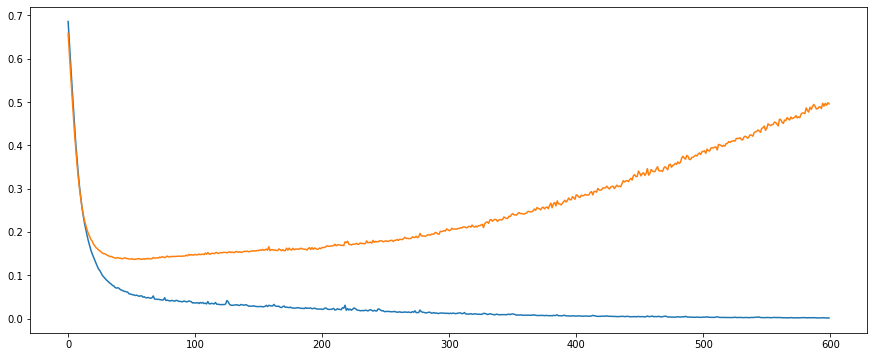

In [34]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(model.history.history))

## Use Callbacks for overfitting

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [38]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 12ms/step - loss: 0.6891 - val_loss: 0.6846
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6775 - val_loss: 0.6733
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6631 - val_loss: 0.6566
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6396 - val_loss: 0.6257
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5989 - val_loss: 0.5818
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5463 - val_loss: 0.5251
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4870 - val_loss: 0.4683
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4287 - val_loss: 0.4131
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3753 - val_loss: 0.3631
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.3289 - val_loss: 0.3217
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.1286
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1279
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.1305
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1288
Epoch 86: early stopping


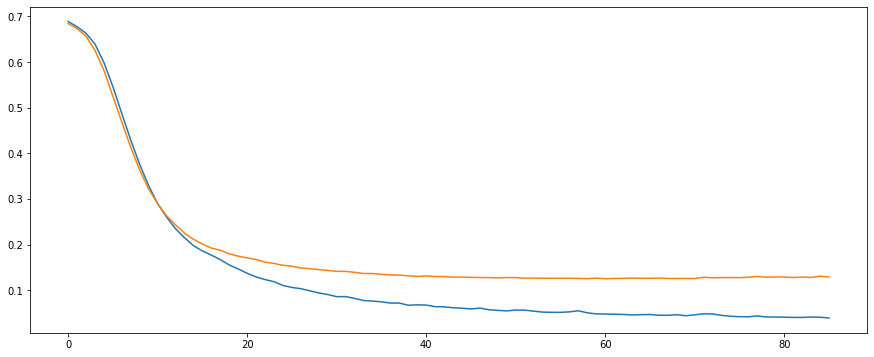

In [39]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(model.history.history))

## Try Dropouts for overfitting

In [41]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 1s 12ms/step - loss: 0.6898 - val_loss: 0.6792
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6645 - val_loss: 0.6669
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6690 - val_loss: 0.6554
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6479 - val_loss: 0.6394
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6360 - val_loss: 0.6222
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6207 - val_loss: 0.6041
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6203 - val_loss: 0.5839
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6054 - val_loss: 0.5656
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5794 - val_loss: 0.5453
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5550 - val_loss: 0.5192
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.1404 - val_loss: 0.1414
Epoch 84/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1054 - val_loss: 0.1403
Epoch 85/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1264 - val_loss: 0.1404
Epoch 86/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1145 - val_loss: 0.1403
Epoch 87/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1036 - val_loss: 0.1469
Epoch 88/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1163 - val_loss: 0.1420
Epoch 89/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1171 - val_loss: 0.1393
Epoch 90/600
13/13 [==============================] - 0s 3ms/step - loss: 0.0982 - val_loss: 0.1371
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.1063 - val_loss: 0.1370
Epoch 92/600
13/13 [==============================] - 0s 3ms/step - loss: 0.1303 - val_loss: 0.1378
Epoch 93/600


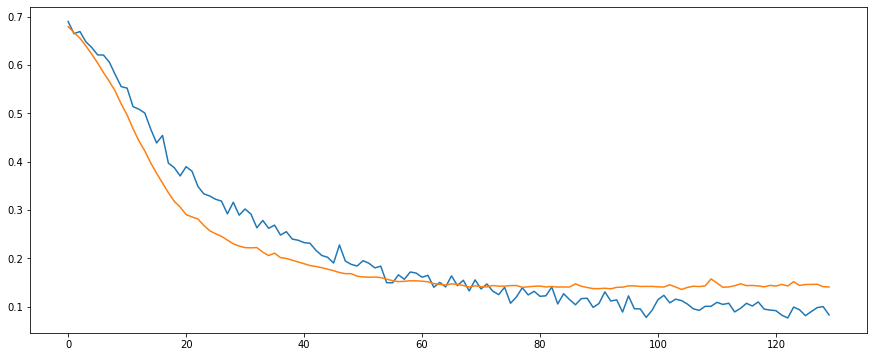

In [43]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(model.history.history))

In [48]:
threshold = 0.5
predictions = np.where(model.predict(X_test) > threshold, 1, 0)

6/6 [==============================] - 0s 1ms/step


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

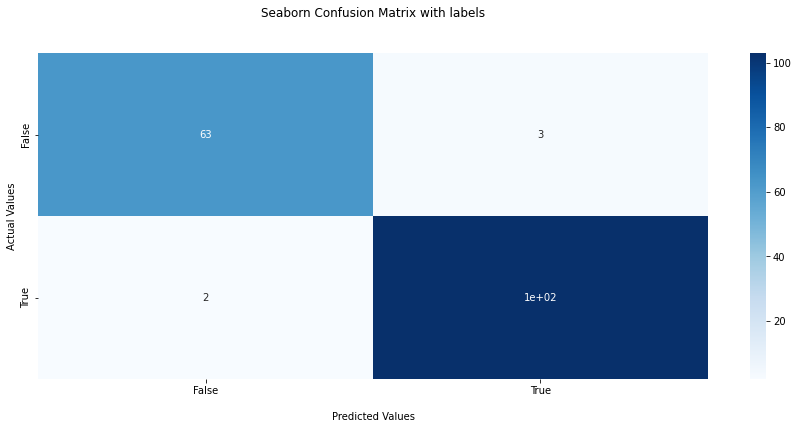

In [65]:
plt.figure(figsize=(15,6))
cm = confusion_matrix(y_test, predictions)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
ax.set_xticklabels(['False','True'])
ax.set_yticklabels(['False','True'])